In [21]:
import pandas as pd
import numpy as np
import h5py
from PIL import Image
import os
import cv2
import random
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from tqdm import tqdm
import keras

In [22]:
def count(l,n):
    count = [0 for _ in range(n)]
    for i in range(n):
        count[i] = l.count(i)
    return count
def getCategory(name):
    for i,elm in enumerate(block_annotation[0]):
        if elm ==name :
            return block_annotation[1][i]
    return -1

def one_hot_n(x,n):
    arr = [0 for _ in range(n)]
    arr[x] = 1
    return np.array(arr);

def one_hot(x):
    return one_hot_n(x,N_categories)


In [23]:
N_categories = 5

In [24]:
block_annotation = pd.read_csv('block_annotation.csv',header=None)

In [25]:
print(block_annotation.shape)
block_annotation.head()

(1587, 2)


,0,1
0,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_19_...,2
1,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_27_...,4
2,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_21_...,4
3,ND8_DIV0+4h_20x_noConfinment_5_ch_4_174.tif,1
4,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_8_c...,0


In [26]:
totals = count(block_annotation[1].tolist(),N_categories)
Threshhold = min(totals)
print(Threshhold)

175


In [27]:
name = '20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_19_ch_4_141.tif'
x = getCategory(name)
print(x)
print(one_hot(x))

2
[0 0 1 0 0]


In [28]:
INPUT_DIR = 'blocks/'
ROWS = 81
COLS = 81
ROWS2 = 64
COLS2 = 64
SIZE = 50
CHANNELS = 3

In [47]:
IMG_SIZE = 50
def create_training_data_with_limit(limit,n):
    totals = [0 for _ in range(n)]
    for file in tqdm(os.listdir(INPUT_DIR)):
        try:
            class_num = getCategory(file)
            if class_num == -1 :
                continue
            if totals[class_num]>=limit:
                continue
            file_path = INPUT_DIR+file
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array,class_num])
            totals[class_num] = totals[class_num] + 1
        except Exception as e:
            print(e)
            
def create_training_data():
    for file in tqdm(os.listdir(INPUT_DIR)):
        try:
            class_num = getCategory(file)
            if class_num > -1 :
                file_path = INPUT_DIR+file
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
        except Exception as e:
            print(e)

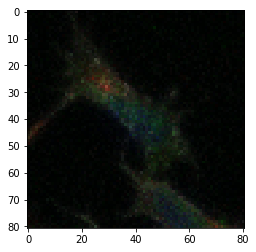

(81, 81, 3)


In [48]:
file_path = 'blocks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_16_ch_4_54.tif'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()
print(img.shape)

In [49]:
training_data = []
create_training_data_with_limit(Threshhold, N_categories)
len(training_data)

100%|██████████| 7867/7867 [00:02<00:00, 3014.81it/s]


875

In [50]:
random.shuffle(training_data)

In [51]:
for sample in training_data[:10]:
    print(sample[1])

4
1
1
2
4
1
0
4
0
4


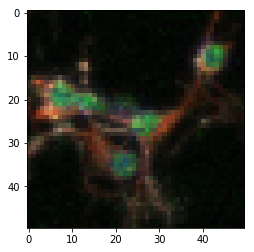

4


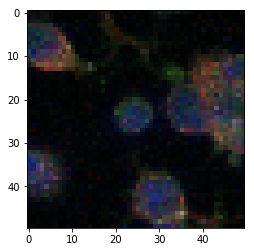

1


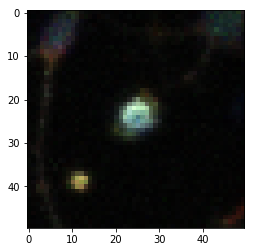

1


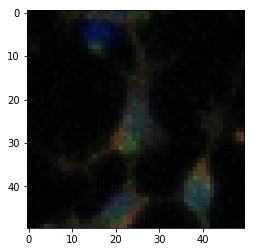

2


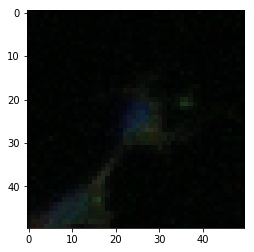

4


In [52]:
def show_img(idx):
#     category = ["dog","cat"]
    img = training_data[idx][0]
    plt.imshow(img)
    plt.show()
    print(training_data[idx][1])
    
for idx in range(0,5):
    show_img(idx)

In [53]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(y).reshape(-1,1)

In [54]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [55]:
print(X.shape) 
print(y.shape)

(875, 50, 50, 3)
